In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [76]:
path=r"C:\Users\osmai\Downloads\archive (9)\heart.csv"
df=pd.read_csv(path)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in columns:
    print(f'variable: {i}...\n',df[i].unique(),'--> Number of categorical variables: ', df[i].nunique())

variable: Sex...
 ['M' 'F'] --> Number of categorical variables:  2
variable: ChestPainType...
 ['ATA' 'NAP' 'ASY' 'TA'] --> Number of categorical variables:  4
variable: RestingECG...
 ['Normal' 'ST' 'LVH'] --> Number of categorical variables:  3
variable: ExerciseAngina...
 ['N' 'Y'] --> Number of categorical variables:  2
variable: ST_Slope...
 ['Up' 'Flat' 'Down'] --> Number of categorical variables:  3


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [82]:
df.select_dtypes(include='number').describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [141]:
colum=df.columns.tolist()
colum

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

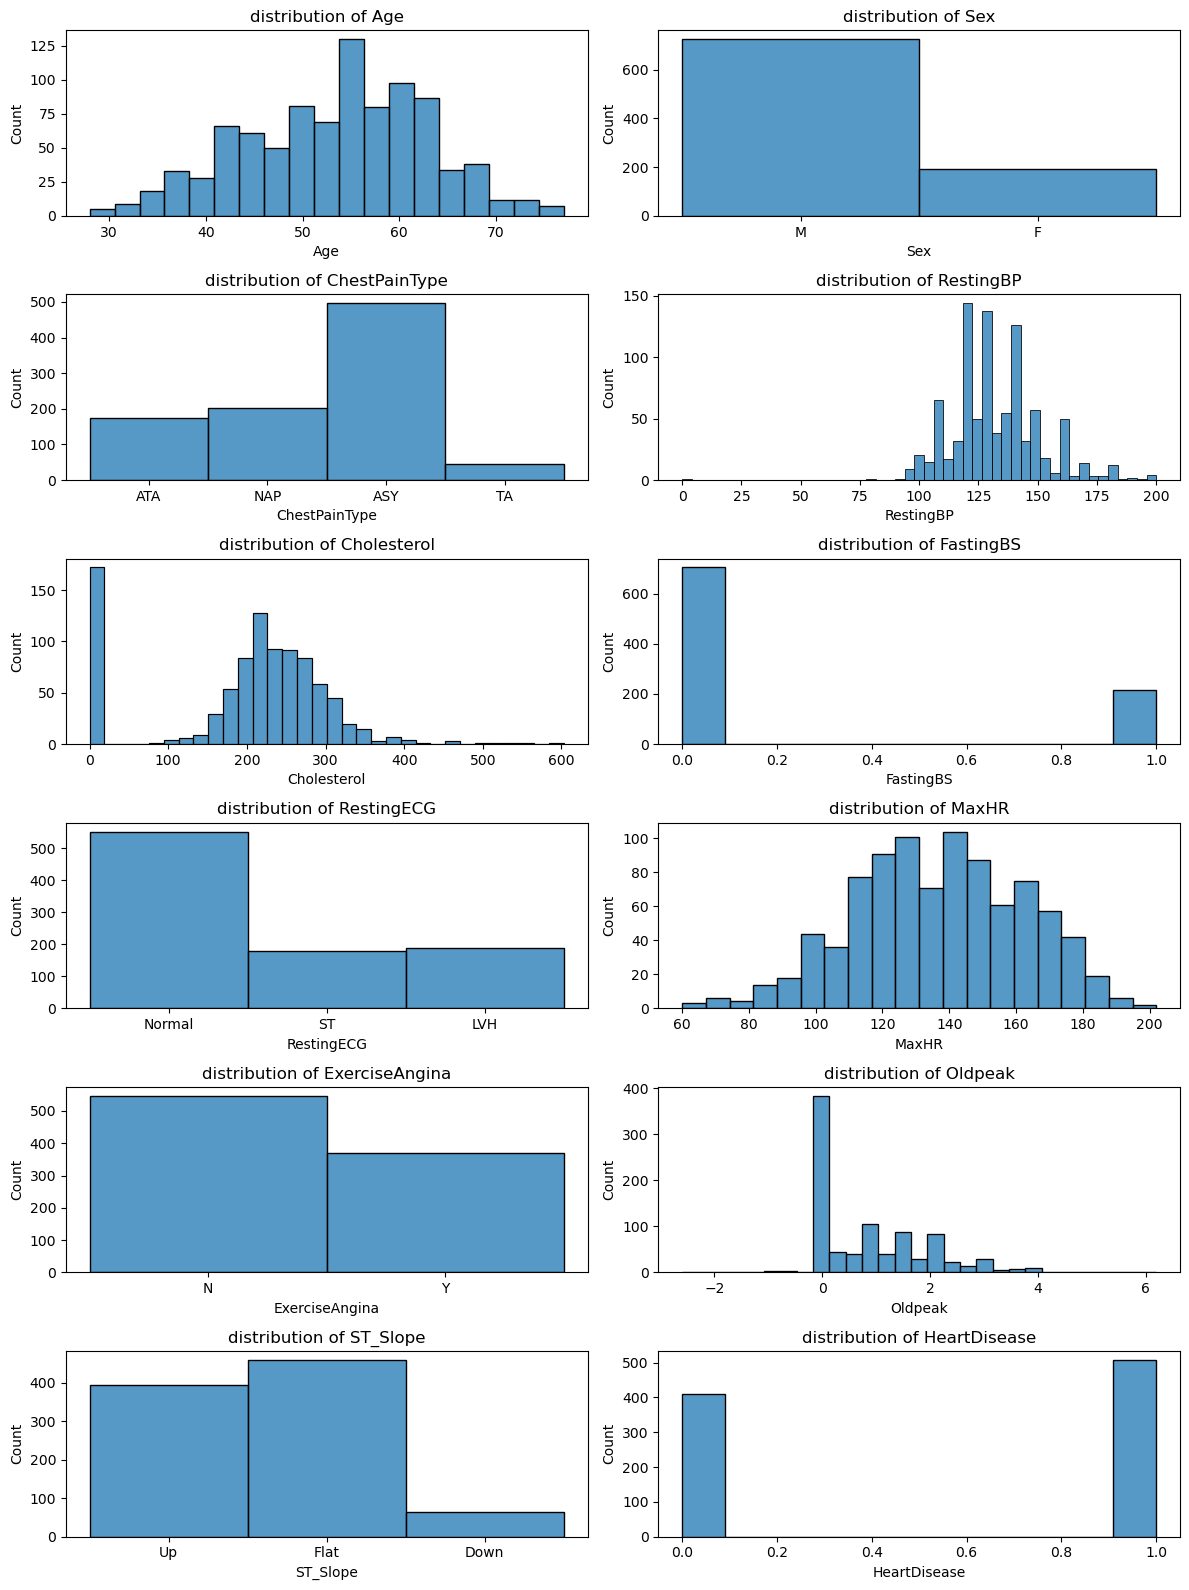

In [145]:
fig,axes = plt.subplots(6,2,figsize=(12,16))
axes=axes.ravel()
for i,j in enumerate(colum):
    sns.histplot(df[j],ax=axes[i])
    axes[i].set_title(f'distribution of {j}')
plt.tight_layout()
plt.show()
                        

In [84]:
df1=df.copy()

In [86]:
for i in columns:
    prefix='cat_'+i
    df_new=pd.get_dummies(df[i],prefix=prefix,dtype=int)
    df1=df1.join(df_new)
    print(df1.shape)
    

(918, 14)
(918, 18)
(918, 21)
(918, 23)
(918, 26)


In [88]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,cat_ChestPainType_NAP,cat_ChestPainType_TA,cat_RestingECG_LVH,cat_RestingECG_Normal,cat_RestingECG_ST,cat_ExerciseAngina_N,cat_ExerciseAngina_Y,cat_ST_Slope_Down,cat_ST_Slope_Flat,cat_ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [90]:
df2=df1.copy()

In [94]:
df2=df2.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,cat_Sex_F,cat_Sex_M,cat_ChestPainType_ASY,...,cat_ChestPainType_NAP,cat_ChestPainType_TA,cat_RestingECG_LVH,cat_RestingECG_Normal,cat_RestingECG_ST,cat_ExerciseAngina_N,cat_ExerciseAngina_Y,cat_ST_Slope_Down,cat_ST_Slope_Flat,cat_ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [126]:
from scipy.stats import chi2_contingency 
columnas=df2.columns.tolist()
columnas


['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'cat_Sex_F',
 'cat_Sex_M',
 'cat_ChestPainType_ASY',
 'cat_ChestPainType_ATA',
 'cat_ChestPainType_NAP',
 'cat_ChestPainType_TA',
 'cat_RestingECG_LVH',
 'cat_RestingECG_Normal',
 'cat_RestingECG_ST',
 'cat_ExerciseAngina_N',
 'cat_ExerciseAngina_Y',
 'cat_ST_Slope_Down',
 'cat_ST_Slope_Flat',
 'cat_ST_Slope_Up']

In [114]:
tab=pd.crosstab(df2['cat_ChestPainType_TA'],df2['HeartDisease'])
chi2,p,dof,expected=chi2_contingency(tab)
chi2,p

(2.2738021313990893, 0.13157675122814316)

In [131]:
for i in columnas:
    tab1=pd.crosstab(df2[i],df2['HeartDisease'])
    chi2,p,dof,expected=chi2_contingency(tab1)
    print(f'chi square analysis in  {i} and  HeartDisease : ', chi2,p)

chi square analysis in  Age and  HeartDisease :  125.36566669222647 1.2816474437527366e-08
chi square analysis in  RestingBP and  HeartDisease :  93.64112634840396 0.014257537302956015
chi square analysis in  Cholesterol and  HeartDisease :  332.18853522591183 1.8599475861266911e-06
chi square analysis in  FastingBS and  HeartDisease :  64.3206790933594 1.0573018731809955e-15
chi square analysis in  MaxHR and  HeartDisease :  241.3205950076166 1.7219219833981512e-10
chi square analysis in  Oldpeak and  HeartDisease :  230.50778751189782 2.520630103639275e-24
chi square analysis in  HeartDisease and  HeartDisease :  913.9583473327997 9.067122948264875e-201
chi square analysis in  cat_Sex_F and  HeartDisease :  84.14510134633774 4.5976174508091984e-20
chi square analysis in  cat_Sex_M and  HeartDisease :  84.14510134633775 4.597617450809164e-20
chi square analysis in  cat_ChestPainType_ASY and  HeartDisease :  243.02113844518294 8.629373889117524e-55
chi square analysis in  cat_ChestPain

## Conclusions from the Chi-Square Test

The Chi-Square analysis was performed to evaluate the association between each categorical feature and the target variable **HeartDisease**. The results show the following:

### 1. Variables with Strong Statistical Association (p < 0.05)

These variables show a significant relationship with HeartDisease and are relevant for predictive modeling:

- Age  
- RestingBP  
- Cholesterol  
- FastingBS  
- MaxHR  
- Oldpeak  
- Sex (F, M)  
- ChestPainType (ASY, ATA, NAP)  
- ExerciseAngina (N, Y)  
- ST_Slope (Up, Flat, Down)

These features contribute valuable information for distinguishing between patients with and without heart disease.

### 2. Variables Without Significant Association (p ≥ 0.05)

These categories do not show evidence of association with HeartDisease:

- ChestPainType_TA  
- RestingECG_LVH

They may not add predictive power to the model.

### 3. Interpretation

Most features in the dataset are significantly associated with HeartDisease, supporting their importance in classification tasks. Only a small number of categories show no statistical relationship, suggesting they can be deprioritized or removed during feature selection.


In [147]:
X=df2.drop(columns='HeartDisease')
Y=df2['HeartDisease']

In [245]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [283]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=20)
tree.fit(X,Y)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

In [285]:
y_pred=tree.predict(X)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

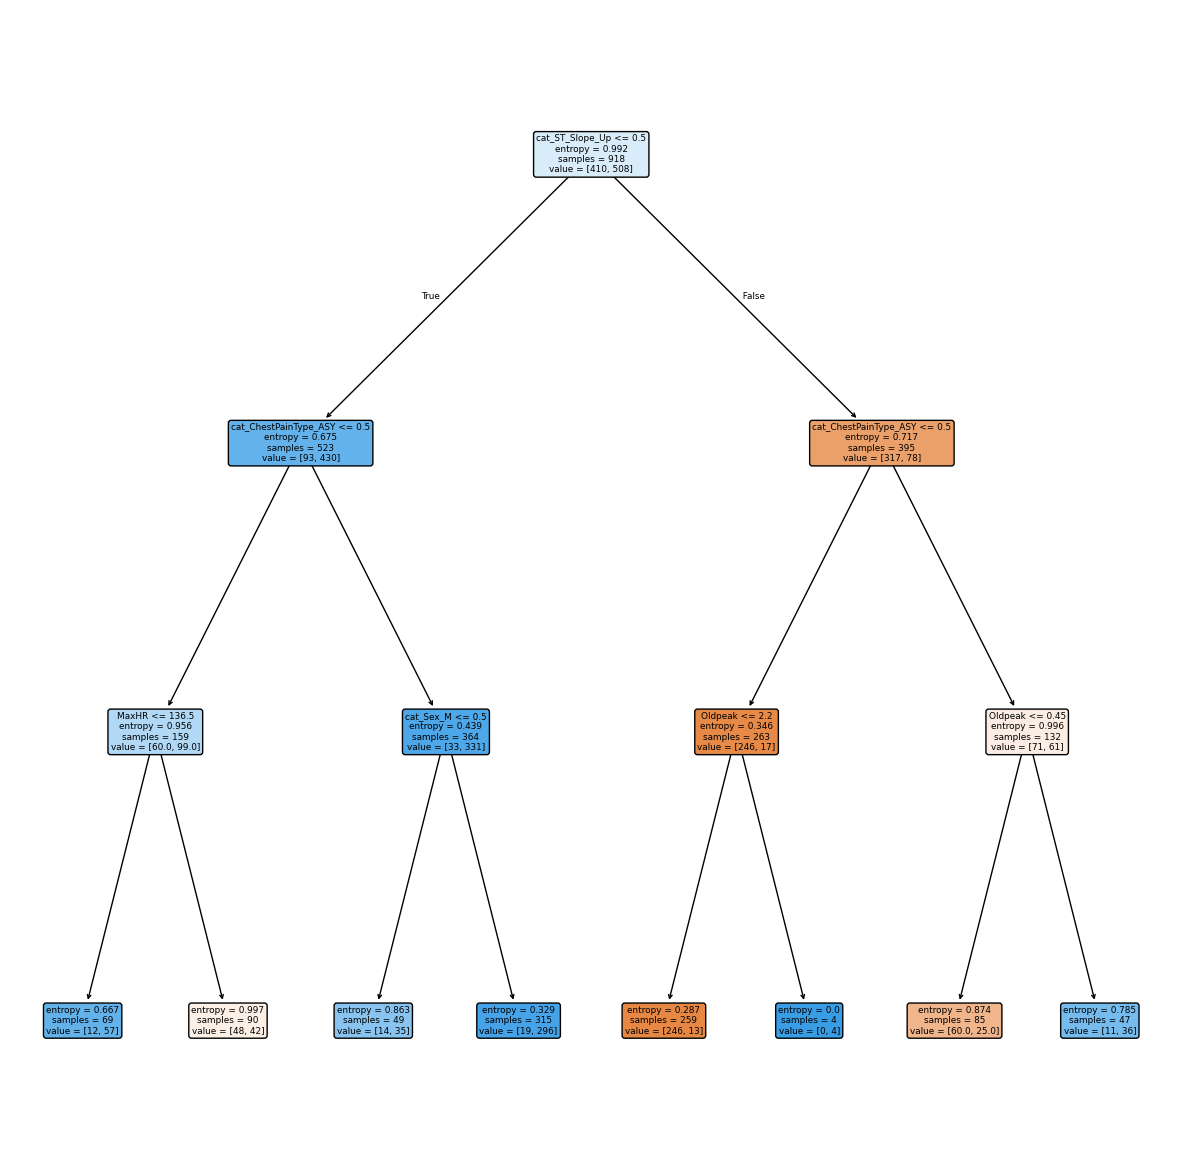

In [293]:
plt.figure(figsize=(15,15))
plot_tree(tree,feature_names=X.columns,filled=True,rounded=True)
plt.show()


# Decision Tree Analysis — Heart Disease Dataset

## 1. Overview

The decision tree model uses several clinical features to determine whether a patient is likely to present heart disease. The most influential variables in the splits are:

- ST_Slope  
- ChestPainType  
- MaxHR  
- Sex  
- Oldpeak

These variables strongly influence the classification outcome according to the entropy reductions observed in the tree.

---

## 2. Key Splits in the Decision Tree

### Root Node — `ST_Slope_Up <= 0.5`

The first and most important decision in the model is whether the patient has an increasing ST slope during exercise.

- If ST_Slope_Up = 0 (not “up”), risk of heart disease increases.  
- If ST_Slope_Up = 1, risk tends to be lower.

This confirms ST slope as a major clinical indicator for cardiovascular health.

---

## 3. Left Branch — Patients with non-increasing ST Slope

### Split: `ChestPainType_ASY <= 0.5`

The next important split considers whether the patient experiences asymptomatic chest pain, which is commonly correlated with positive heart disease diagnoses.

- ASY = 1 often strongly indicates disease.  
- ASY = 0 leads to further subdivisions using variables such as:
  - MaxHR  
  - Sex  

### MaxHR ≤ 136.5

Patients with a lower MaxHR are more likely to present heart disease, consistent with clinical expectations.

---

## 4. Right Branch — Patients with ST_Slope_Up = 1

### Split: `ChestPainType_ASY <= 0.5`

Even on this side of the tree, asymptomatic chest pain remains an important predictor.

### Oldpeak as a key splitter

For these patients, Oldpeak (ST depression induced by exercise) becomes the next critical indicator.

- Oldpeak > 2.2 increases likelihood of heart disease.  
- Oldpeak ≤ 0.45 strongly reduces the probability.

Oldpeak is known clinically to represent ischemic response to exercise and is one of the strongest markers of disease.

---

## 5. Final Observations

Across the tree:

- Asymptomatic chest pain (ASY) is one of the strongest predictors of heart disease.  
- Higher Oldpeak significantly increases the probability of a positive diagnosis.  
- Lower MaxHR is consistently associated with heart disease.  
- Sex has predictive power, but lower than the previous features.  
- The tree structure aligns with established clinical cardiology patterns.

---

## 6. Conclusion

The decision tree provides a clear and interpretable set of clinical rules for predicting heart disease. The model highlights the importance of exercise-related ECG features (ST_Slope, Oldpeak), symptomatic patterns (ChestPainType), and physiological capacity (MaxHR).

Understanding these splits allows clinicians and data scientists to better identify high-risk patients and support more informed decision-making.


In [207]:
df2['prediction']=y_pred

In [209]:
df2[['prediction','HeartDisease']]

,prediction,HeartDisease
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
913,1,1
914,1,1
915,1,1
916,0,1


In [251]:
tab2=pd.crosstab(df2['prediction'],df2['HeartDisease'])
tab2

HeartDisease,0,1
prediction,,
0,336,35
1,74,473


In [314]:
error=np.sum((df2['prediction']-df2['HeartDisease'])**2)
error2=error/len(df2)
error2

0.1187363834422658

In [213]:
from sklearn.model_selection import KFold,cross_val_score

In [296]:
cv=KFold(n_splits=15,shuffle=True)



In [298]:
scores=cross_val_score(tree,X,Y,cv=cv,scoring='accuracy', n_jobs=2)
scores

array([0.83870968, 0.85483871, 0.87096774, 0.80327869, 0.78688525,
       0.83606557, 0.86885246, 0.73770492, 0.86885246, 0.80327869,
       0.91803279, 0.80327869, 0.7704918 , 0.85245902, 0.90163934])

In [299]:
score=np.mean(scores)
score

0.8343557200775603

In [235]:
from sklearn.tree import plot_tree

In [243]:
for i in range(1,11):
    tree1=DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_split=20)
    tree1.fit(X,Y)
    cv=KFold(n_splits=15,shuffle=True)
    scores=np.mean(cross_val_score(tree,X,Y,cv=cv,scoring='accuracy', n_jobs=2))
    print(f'Score for max_depth= {i}= ', scores)
    
    

Score for max_depth= 1=  0.834461484223515
Score for max_depth= 2=  0.8179270227392915
Score for max_depth= 3=  0.8311475409836065
Score for max_depth= 4=  0.8138022210470652
Score for max_depth= 5=  0.8158646218931783
Score for max_depth= 6=  0.8311827956989248
Score for max_depth= 7=  0.8169927727833598
Score for max_depth= 8=  0.8148422351489513
Score for max_depth= 9=  0.8105587872377931
Score for max_depth= 10=  0.8180327868852457


In [316]:
from sklearn.ensemble import RandomForestClassifier

In [390]:
forest=RandomForestClassifier(criterion='entropy',oob_score=True,n_estimators=1000)
forest.fit(X,Y)



RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True)

In [392]:
df2["rforest_pred"]= forest.predict(X)
df2[["rforest_pred",'HeartDisease']]

,rforest_pred,HeartDisease
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
913,1,1
914,1,1
915,1,1
916,1,1


In [408]:
tabn=pd.crosstab(df2['rforest_pred'],df['HeartDisease'], colnames=['actual'],rownames=['prediction'])
tabn

actual,0,1
prediction,,
0,410,0
1,0,508


In [412]:
forest.feature_importances_

array([0.0847553 , 0.07812162, 0.10382054, 0.02688372, 0.10116265,
       0.09795372, 0.02352556, 0.02238445, 0.08009451, 0.02201929,
       0.01445699, 0.00647453, 0.01564334, 0.01359547, 0.01048364,
       0.04303573, 0.0428229 , 0.00695155, 0.08564005, 0.12017445])

In [432]:
pd.DataFrame(forest.oob_decision_function_,columns=['no enfermedad','enfermedad'])


,no enfermedad,enfermedad
0,1.000000,0.000000
1,0.692708,0.307292
2,0.976331,0.023669
3,0.428962,0.571038
4,0.988338,0.011662
...,...,...
913,0.366366,0.633634
914,0.100000,0.900000
915,0.046753,0.953247
916,0.848238,0.151762


In [406]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("Accuracy:", accuracy_score(Y, y_pred))
print("Recall:", recall_score(Y, y_pred))
print("F1:", f1_score(Y, y_pred))
print("OOB Score:", forest.oob_score_)

Accuracy: 0.8518518518518519
Recall: 0.84251968503937
F1: 0.8629032258064516
OOB Score: 0.8703703703703703


In [396]:
error=((df2['rforest_pred']-df['HeartDisease'])**2)
aveg_error=np.sum(error)/len(df2)
aveg_error


0.0